In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.optimize import curve_fit

In [41]:
def screen_res(value):
    if value >= 0 and value < 10:
        return 0.00001
    if value >= 10 and value < 100:
        return 0.0001
    if value >= 100 and value < 1000:
        return 0.001

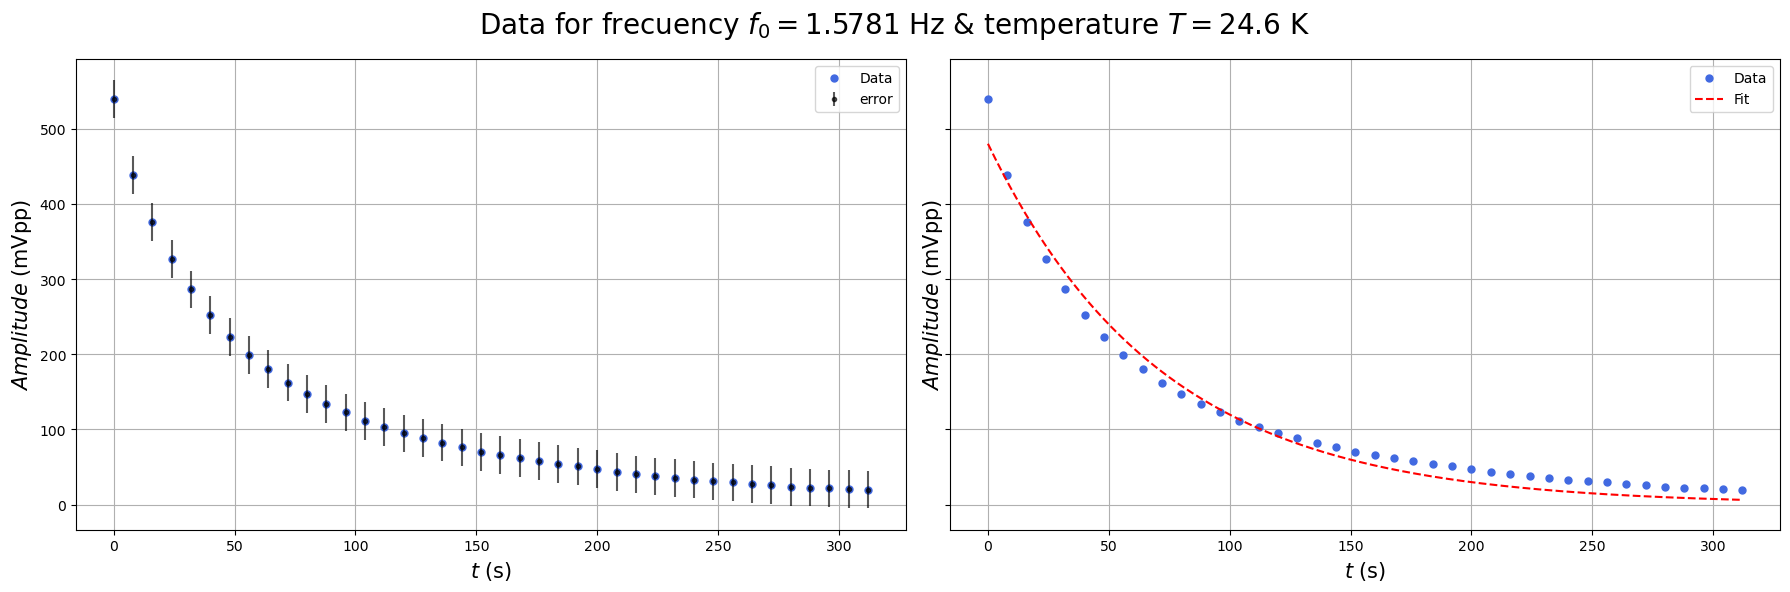



For a fit of the type y = a·exp(-x/b), we got:
a = 479.9 +/- 10.6
b = 72 +/- 2
R²= 0.98016


This gives us a Q value of:
Q = 357 +/- 12
At frecuency 1.5781 Hz & temperature 24.6 K


In [55]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v= np.loadtxt( "data.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = [np.max([val*0.003/100+ 0.025*1000,screen_res(val)]) for val in v]
#v_error = np.full( len(v), fill_value = 0.001 )

t = np.arange(0,8*len(v),8)
# # Frecuency and temperature of work
T_ini = 24
T_fin = 25.2
T_value = np.mean( [T_ini,T_fin])
f_0 = 1.5781
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
def f(x,a,b): #Definition of the function to fit#
    aux = a*np.exp(-x/b)
    return aux

resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(18,6), dpi=100);
ax = fig.subplots(1, 2, sharex = True, sharey = True)
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 20)
# First plot (Simple plot of the data)
ax[0].grid()
ax[0].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[0].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[0].plot(t,v,'.',c='royalblue',label="Data",ms = 10)
ax[0].errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="error")
ax[0].legend()
#Second plot (Data and fit plot)
ax[1].grid()
ax[1].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[1].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[1].plot(t,v,'.',c='royalblue',label="Data", ms=10);
ax[1].plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
ax[1].legend()
#to make it look good
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\n")
print(r"For a fit of the type y = a·exp(-x/b), we got:")
print(r"a = {0:.1f} +/- {1:.1f}".format(resval[0],reserr[0]))
print(r"b = {0:.0f} +/- {1:.0f}".format(resval[1],reserr[1]))
print(r"R²= {0:.5f}".format(R2))
print("\n")
print(r"This gives us a Q value of:")
print(r"Q = {0:.0f} +/- {1:.0f}".format(Q_value,Q_error))
print(r"At frecuency {0} {1} & temperature {2:.1f} {3}".format(f_0, f_unit, T_value, T_unit))

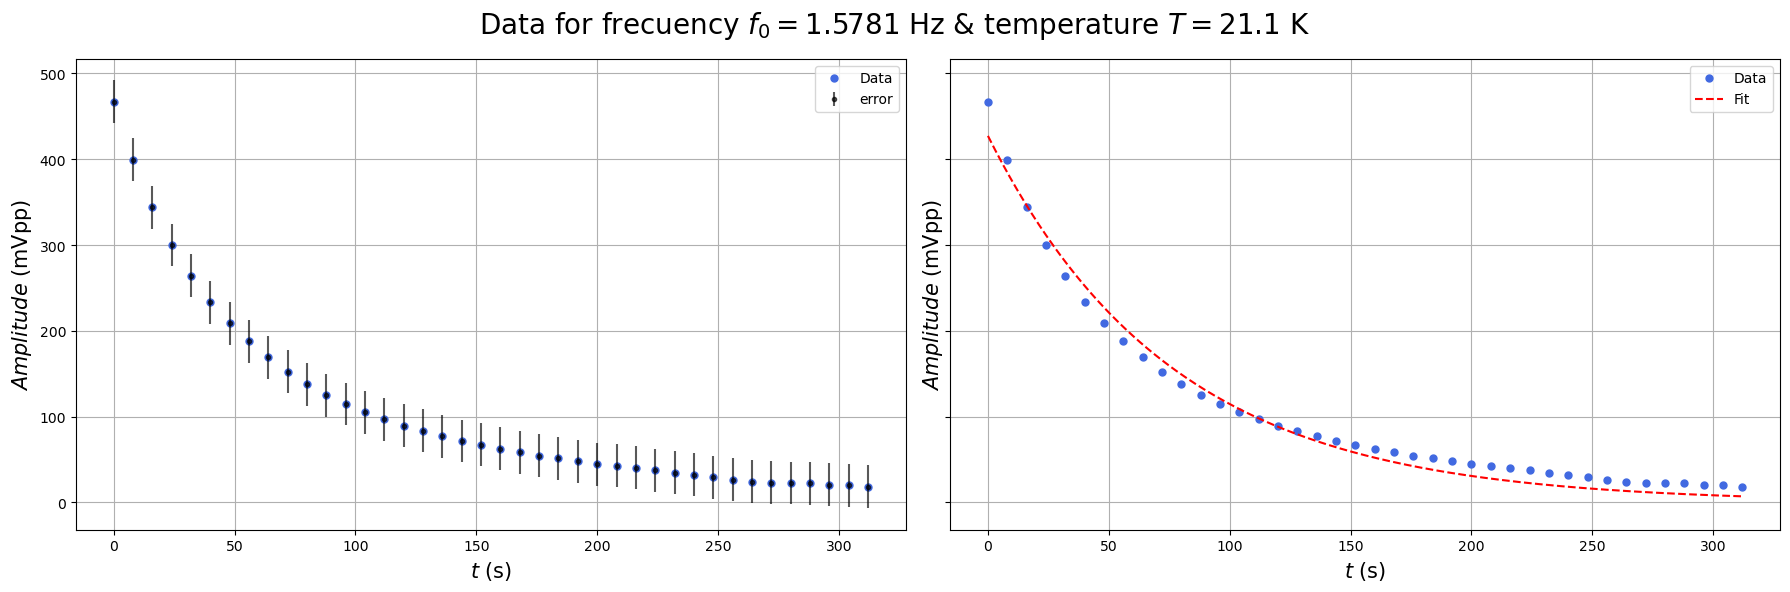



For a fit of the type y = a·exp(-x/b), we got:
a = 427.2 +/- 8.2
b = 76 +/- 2
R²= 0.98488


This gives us a Q value of:
Q = 377 +/- 11
At frecuency 1.5781 Hz & temperature 21.1 K


In [47]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v= np.loadtxt( "data2.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = v*0.003/100+ 0.025/100*100*1000
#v_error = np.full( len(v), fill_value = 0.001 )

t = np.arange(0,8*len(v),8)
# # Frecuency and temperature of work
T_ini = 21.56
T_fin = 20.717
T_value = np.mean( [T_ini,T_fin])
f_0 = 1.5781
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
def f(x,a,b): #Definition of the function to fit#
    aux = a*np.exp(-x/b)
    return aux

resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(18,6), dpi=100);
ax = fig.subplots(1, 2, sharex = True, sharey = True)
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 20)
# First plot (Simple plot of the data)
ax[0].grid()
ax[0].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[0].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[0].plot(t,v,'.',c='royalblue',label="Data",ms = 10)
ax[0].errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="error")
ax[0].legend()
#Second plot (Data and fit plot)
ax[1].grid()
ax[1].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[1].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[1].plot(t,v,'.',c='royalblue',label="Data", ms=10);
ax[1].plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
ax[1].legend()
#to make it look good
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\n")
print(r"For a fit of the type y = a·exp(-x/b), we got:")
print(r"a = {0:.1f} +/- {1:.1f}".format(resval[0],reserr[0]))
print(r"b = {0:.0f} +/- {1:.0f}".format(resval[1],reserr[1]))
print(r"R²= {0:.5f}".format(R2))
print("\n")
print(r"This gives us a Q value of:")
print(r"Q = {0:.0f} +/- {1:.0f}".format(Q_value,Q_error))
print(r"At frecuency {0} {1} & temperature {2:.1f} {3}".format(f_0, f_unit, T_value, T_unit))

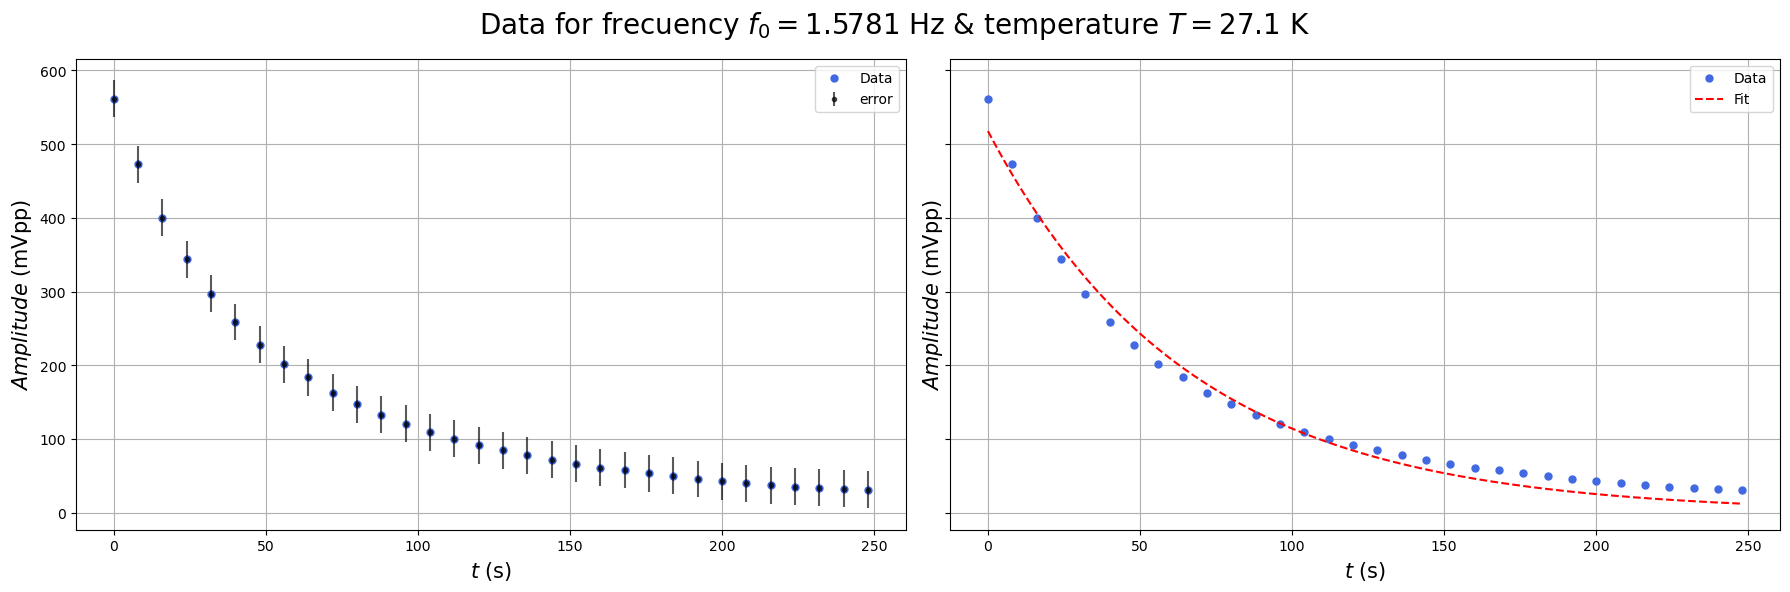



For a fit of the type y = a·exp(-x/b), we got:
a = 517.6 +/- 10.9
b = 66 +/- 2
R²= 0.98424


This gives us a Q value of:
Q = 328 +/- 10
At frecuency 1.5781 Hz & temperature 27.1 K


In [48]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v= np.loadtxt( "data3.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = v*0.003/100 + 0.025/100*100*1000
#v_error = np.full( len(v), fill_value = 0.001 )

t = np.arange(0,8*len(v),8)
# # Frecuency and temperature of work
T_ini = 26.8
T_fin = 27.5
T_value = np.mean( [T_ini,T_fin])
f_0 = 1.5781
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
def f(x,a,b): #Definition of the function to fit#
    aux = a*np.exp(-x/b)
    return aux

resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(18,6), dpi=100);
ax = fig.subplots(1, 2, sharex = True, sharey = True)
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 20)
# First plot (Simple plot of the data)
ax[0].grid()
ax[0].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[0].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[0].plot(t,v,'.',c='royalblue',label="Data",ms = 10)
ax[0].errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="error")
ax[0].legend()
#Second plot (Data and fit plot)
ax[1].grid()
ax[1].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[1].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[1].plot(t,v,'.',c='royalblue',label="Data", ms=10);
ax[1].plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
ax[1].legend()
#to make it look good
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\n")
print(r"For a fit of the type y = a·exp(-x/b), we got:")
print(r"a = {0:.1f} +/- {1:.1f}".format(resval[0],reserr[0]))
print(r"b = {0:.0f} +/- {1:.0f}".format(resval[1],reserr[1]))
print(r"R²= {0:.5f}".format(R2))
print("\n")
print(r"This gives us a Q value of:")
print(r"Q = {0:.0f} +/- {1:.0f}".format(Q_value,Q_error))
print(r"At frecuency {0} {1} & temperature {2:.1f} {3}".format(f_0, f_unit, T_value, T_unit))

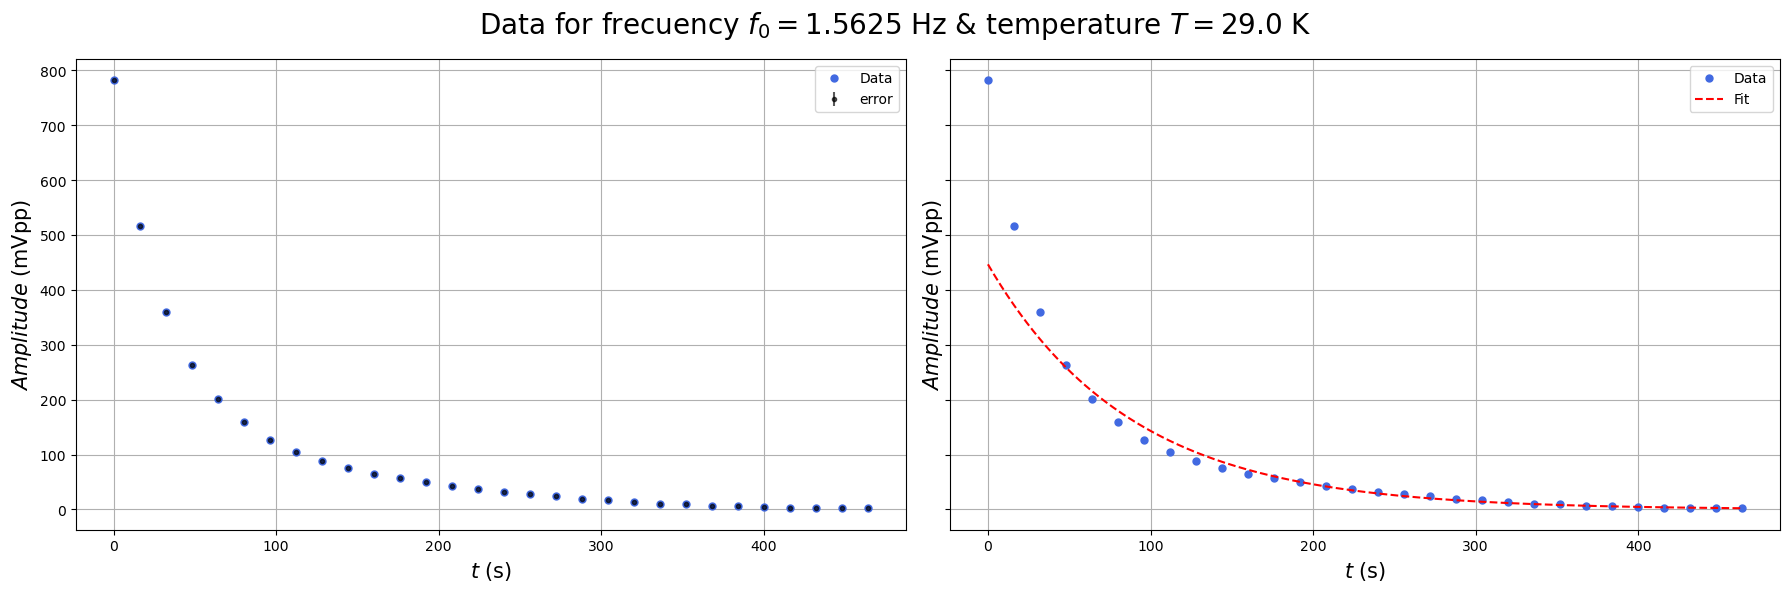



For a fit of the type y = a·exp(-x/b), we got:
a = 446.6 +/- 26.5
b = 88 +/- 2
R²= 0.84289


This gives us a Q value of:
Q = 431.5 +/- 8.3
At frecuency 1.5625 Hz & temperature 29.0 K


In [38]:
# # Import the values of the data, time,amplitude in voltage and temperature from file # #
v= np.loadtxt( "data4.txt" , unpack = True , delimiter = "\t",usecols = (0))
v_error = v*0.003/100 #+ 0.025/100*100*1000
#v_error = np.full( len(v), fill_value = 0.001 )

t = np.arange(0,16*len(v),16)
# # Frecuency and temperature of work
T_ini = 28.263
T_fin = 29.76
T_value = np.mean( [T_ini,T_fin])
f_0 = 1.5625
errf_0 = 0

# # Declare units for the data # #
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

# # Fit of the data # #
def f(x,a,b): #Definition of the function to fit#
    aux = a*np.exp(-x/b)
    return aux

resval,rescov = curve_fit( f, t, v, [200,10],sigma = v_error)
reserr = np.sqrt(np.diag(rescov))
R2 = 1 - (np.sum( ( v - f( t, *resval) )**2 ) / np.sum( ( v - np.mean(v) )**2 ))


# # Plot of the data with fit # #

#sampling time
h = max([abs((max(t)-min(t))/1000),1])
fit_time = np.arange(min(t), max(t)+h, h)
fit_amplitude = resval[0]*np.exp(-fit_time/resval[1])

fig = plt.figure(figsize=(18,6), dpi=100);
ax = fig.subplots(1, 2, sharex = True, sharey = True)
fig.suptitle(r"Data for frecuency $f_0 = {0}$ {1} & temperature $T = {2:.1f}$ {3}".format(f_0, f_unit, T_value, T_unit), size = 20)
# First plot (Simple plot of the data)
ax[0].grid()
ax[0].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[0].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[0].plot(t,v,'.',c='royalblue',label="Data",ms = 10)
ax[0].errorbar(t, v, yerr=v_error, fmt=".k", capsize=0,alpha = 0.65,label="error")
ax[0].legend()
#Second plot (Data and fit plot)
ax[1].grid()
ax[1].set_xlabel(r"$t$ ({0})".format(t_unit), size = 15)
ax[1].set_ylabel(r"$Amplitude$ ({0})".format(v_unit), size = 15)
ax[1].plot(t,v,'.',c='royalblue',label="Data", ms=10);
ax[1].plot(fit_time,fit_amplitude,'--',c='red',label="Fit")
ax[1].legend()
#to make it look good
plt.tight_layout()
plt.show()

# # Calculus of the Q-value # #
Q_value = f_0*resval[1]*m.pi
Q_error = Q_value*m.sqrt( (reserr[1]/resval[1])**2 + (errf_0/f_0)**2 )

# # Display results # #
print("\n")
print(r"For a fit of the type y = a·exp(-x/b), we got:")
print(r"a = {0:.1f} +/- {1:.1f}".format(resval[0],reserr[0]))
print(r"b = {0:.0f} +/- {1:.0f}".format(resval[1],reserr[1]))
print(r"R²= {0:.5f}".format(R2))
print("\n")
print(r"This gives us a Q value of:")
print(r"Q = {0:.1f} +/- {1:.1f}".format(Q_value,Q_error))
print(r"At frecuency {0} {1} & temperature {2:.1f} {3}".format(f_0, f_unit, T_value, T_unit))

In [43]:
print(v_error)

[0.01617561, 0.01314093, 0.011282790000000001, 0.009804150000000001, 0.00858405, 0.007556070000000001, 0.00668289, 0.00596682, 0.00539898, 0.00487005, 0.00440991, 0.00400386, 0.00367728, 0.00334302, 0.0030845700000000005, 0.002839389, 0.002648334, 0.0024704070000000004, 0.002284023, 0.0021046140000000003, 0.0019678589999999998, 0.001857057, 0.001730619, 0.0016253370000000001, 0.001521549, 0.0014203470000000002, 0.0012960390000000001, 0.00120834, 0.0011239829999999998, 0.0010637519999999998, 0.000994668, 0.000923928, 0.000883212, 0.000830679, 0.000790533, 0.000709698, 0.000677913, 0.0006420810000000001, 0.0006287580000000001, 0.0006007949999999999]
